# Post Midsem work

In [ ]:
import pandas as pd
import numpy as np 
import itertools
import keras
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img 
from keras.models import Sequential 
from keras import optimizers
from keras.preprocessing import image
from keras.layers import Dropout, Flatten, Dense 
from keras import applications 
from keras.utils.np_utils import to_categorical 
import matplotlib.pyplot as plt 
import matplotlib.image as mpimg
%matplotlib inline
import math 
import datetime
import time


SyntaxError: invalid character in identifier (<ipython-input-2-cd7e1ff92f81>, line 5)

# From here, you're planning on taking the hdf5 format file into an input layer of CNN

In [3]:
from PIL import Image
import math
#entropy
from skimage.feature import greycomatrix
#for energy
from pywt import dwt2
import sys

In [4]:
import os
import h5py as h5
import numpy as np
import seaborn as sns
import pandas as pd
import glob
import scipy.stats as st
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from scipy.misc import imshow

In [5]:
class Patient(object):
    PID = ""
    image=""
    label=""
    tumorBorder=""
    tumorMask=""
    
    def __init__(self, PID, image, label,tumorBorder,tumorMask):
        self.PID = PID
        self.image = image
        self.label = label
        self.tumorBorder=tumorBorder
        self.tumorMask=tumorMask

In [6]:
f=h5.File("1.mat","r")
list(f['/cjdata'].keys())

p=Patient('','','','','')
p.image=np.mat(f['/cjdata/image'])
p.PID=np.array(f['/cjdata/PID'])
p.label=np.array(f['/cjdata/label'])
p.tumorBorder=np.mat(f['/cjdata/tumorBorder'])
p.tumorMask=np.mat(f['/cjdata/tumorMask'])

In [7]:
f=[]
file_path="C:/Users/Sandeep Chinnareddy/Desktop/4th year - second semester/BIO Project DOP/BrainTumorClassification-master/Data"

for i in range(3064):
     f.append(h5.File(os.path.join(file_path,str(i+1)+".mat"),'a'))

In [8]:
f

[<HDF5 file "1.mat" (mode r+)>,
 <HDF5 file "2.mat" (mode r+)>,
 <HDF5 file "3.mat" (mode r+)>,
 <HDF5 file "4.mat" (mode r+)>,
 <HDF5 file "5.mat" (mode r+)>,
 <HDF5 file "6.mat" (mode r+)>,
 <HDF5 file "7.mat" (mode r+)>,
 <HDF5 file "8.mat" (mode r+)>,
 <HDF5 file "9.mat" (mode r+)>,
 <HDF5 file "10.mat" (mode r+)>,
 <HDF5 file "11.mat" (mode r+)>,
 <HDF5 file "12.mat" (mode r+)>,
 <HDF5 file "13.mat" (mode r+)>,
 <HDF5 file "14.mat" (mode r+)>,
 <HDF5 file "15.mat" (mode r+)>,
 <HDF5 file "16.mat" (mode r+)>,
 <HDF5 file "17.mat" (mode r+)>,
 <HDF5 file "18.mat" (mode r+)>,
 <HDF5 file "19.mat" (mode r+)>,
 <HDF5 file "20.mat" (mode r+)>,
 <HDF5 file "21.mat" (mode r+)>,
 <HDF5 file "22.mat" (mode r+)>,
 <HDF5 file "23.mat" (mode r+)>,
 <HDF5 file "24.mat" (mode r+)>,
 <HDF5 file "25.mat" (mode r+)>,
 <HDF5 file "26.mat" (mode r+)>,
 <HDF5 file "27.mat" (mode r+)>,
 <HDF5 file "28.mat" (mode r+)>,
 <HDF5 file "29.mat" (mode r+)>,
 <HDF5 file "30.mat" (mode r+)>,
 <HDF5 file "31.mat

In [9]:
d={'PID':[],
   'image':[],
   'label':[],
   'tumorBorder':[],
   'tumorMask':[]}

In [10]:
for i in range(0, 3064):
    d['PID'].append(np.array(f[i]['/cjdata/PID']))
    d['image'].append(np.array(f[i]['/cjdata/image']))
    d['label'].append(f[i]['/cjdata/label'][0][0])
    d['tumorBorder'].append(f[i]['/cjdata/tumorBorder'][0])
    d['tumorMask'].append(f[i]['/cjdata/tumorMask'][0])

# Patient_data_images contain the image data of each MRI scan (3064 point) Shall we sent it through the CNN??

In [11]:
columns=['PID', 'image', 'label', 'tumorBorder', 'tumorMask']
Patient_data_images=pd.DataFrame(list(d['image']))       

In [12]:
#Patient_data_images=Patient_data_images.transpose()

In [13]:
Patient_data_images[0][3000]

array([[ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       ...,
       [ 1,  1, 10, ..., 21, 12, 12],
       [ 0,  0,  9, ..., 19, 15, 12],
       [ 0,  0,  6, ..., 16, 15, 11]], dtype=int16)

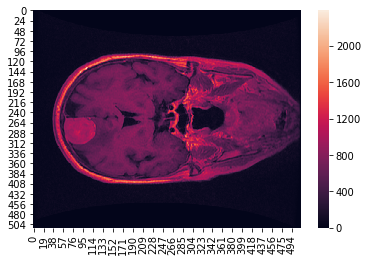

In [14]:
sns.heatmap(Patient_data_images[0][433])

In [15]:
data_images = Patient_data_images[0]

In [16]:
data_images[4]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int16)

In [45]:
im = []
for i in range(3064):        
        image = data_images[i]
        hi = np.max(image)
        lo = np.min(image)
        image = (((image - lo)/(hi-lo))*255).astype(np.uint8)
        im.append(Image.fromarray(image))
        

In [46]:
print(len(im))

3064


In [47]:
Data = im

## The list Data contains all the 3064 jpeg images of the dataset 

# Here we narrowed down "data_images" to be the 2D array list of all the images. Now we have to figure out how to put this as input layer

In [17]:
columns=['PID', 'image', 'label', 'tumorBorder', 'tumorMask']
dataset = pd.DataFrame(list(d.values()),columns)        
dataset = dataset.transpose()

In [18]:
# dataset = dataset.drop('PID',axis=1)
# dataset = dataset.drop('tumorBorder',axis=1)
# dataset = dataset.drop('tumorMask',axis=1)


In [19]:
dataset

,PID,image,label,tumorBorder,tumorMask
0,"[[49], [48], [48], [51], [54], [48]]","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1,"[267.6152450090744, 231.37568058076226, 277.83...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1,"[[49], [48], [48], [51], [54], [48]]","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1,"[319.33101045296166, 153.42160278745644, 302.3...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2,"[[49], [48], [48], [51], [54], [48]]","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1,"[280.08362369337976, 173.0452961672474, 273.83...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3,"[[49], [48], [48], [51], [54], [48]]","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1,"[279.191637630662, 237.26829268292684, 293.463...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
4,"[[49], [48], [48], [51], [54], [48]]","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1,"[286.32752613240416, 231.9163763066202, 297.03...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
5,"[[49], [48], [48], [53], [55], [50]]","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1,"[285.4355400696864, 184.6411149825784, 273.839...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
6,"[[49], [48], [48], [53], [55], [50]]","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1,"[257.7839721254355, 222.10452961672473, 264.02...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
7,"[[49], [48], [48], [53], [55], [50]]","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1,"[289.89547038327527, 193.5609756097561, 296.13...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
8,"[[49], [48], [49], [48], [49], [54]]","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1,"[240.83623693379792, 257.7839721254355, 232.80...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
9,"[[49], [48], [49], [48], [49], [54]]","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1,"[248.86411149825784, 256.89198606271776, 238.1...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


In [20]:
dataset_wo_label = dataset.drop('label',axis=1)

### Shuffling the dataset and splitting

In [59]:
#df_x = dataset.iloc[:,0:1]
df_x = dataset_wo_label
df_y = dataset.iloc[:,2:3]

In [22]:
x_train, x_test, y_train, y_test= train_test_split(df_x,df_y,test_size=.2,random_state=4)

In [23]:
x_test

,PID,image,tumorBorder,tumorMask
1436,"[[57], [56], [57], [57], [50]]","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[241.06263007554819, 192.85010406043855, 244.8...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2429,"[[77], [82], [48], [52], [56], [57], [52], [52]]","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[190.08166523873314, 244.86024311733058, 207.0...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1368,"[[49], [48], [52], [57], [49], [50]]","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[267.59581881533103, 184.6411149825784, 255.10...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1028,"[[49], [48], [49], [48], [49], [55]]","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[235.66375590791657, 211.48732073807278, 234.3...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
102,"[[49], [48], [55], [52], [57], [52]]","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[220.91539749869563, 152.73163283860438, 206.5...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
717,"[[49], [48], [49], [48], [50], [48]]","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[301.82996411107194, 389.47568871682785, 308.4...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2181,"[[77], [82], [48], [51], [57], [52], [55], [51...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[251.17113818454277, 287.3568106348583, 241.94...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
925,"[[49], [48], [55], [52], [57], [53]]","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[260.1741209763357, 190.28536161700399, 250.19...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1845,"[[77], [82], [48], [52], [56], [50], [57], [52]]","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[182.49384611273416, 210.72874305847796, 161.8...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2794,"[[77], [82], [48], [52], [48], [50], [52], [48...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 8, 14, 22, 32,...","[218.53658536585365, 165.01742160278746, 184.6...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


### Image file and labels split into train and test sets are ready 

In [24]:
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

datagen = ImageDataGenerator(
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')

In [25]:
x_train['image'][2000]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int16)

# Creating a CNN model


In [26]:

import pandas as pd
import numpy as np
import cv2 
import os
import itertools
import shutil
#import imutils
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from glob import glob
import matplotlib.pyplot as plt

# import plotly.graph_objs as go
# from plotly.offline import init_notebook_mode, iplot
# from plotly import tools

from keras.preprocessing.image import ImageDataGenerator
from keras.applications.vgg16 import VGG16, preprocess_input
from keras import layers
from keras.models import Model, Sequential
from keras.optimizers import Adam, RMSprop
from keras.callbacks import EarlyStopping

In [49]:
from PIL import Image #adds support for opening, manipulating, and saving many different image file formats
from tqdm import tqdm #adds progress bar for the loops
dimentions=list()
x=1
for images in (Data):
    
    dim = images
    size= dim.size
    if size not in dimentions:
        dimentions.append(size)
        x+=1
    if(x>50): #going through all the images will take up lot of memory, so therefore we will check until we get three different dimentions.
        break
print(dimentions)

[(512, 512), (256, 256)]


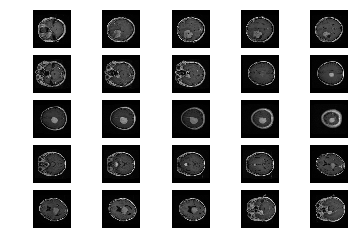

In [55]:
import numpy
def plot_images(photos) : #to plot multiple image
    x=0
    for image in photos:
        #image_cv = image
        image_cv = numpy.array(image) 
        # Convert RGB to BGR 
        #image_cv = image_cv[:, :, ::-1].copy()
        plt.subplot(5, 5, x+1)
        plt.imshow(cv2.cvtColor(image_cv, cv2.COLOR_BGR2RGB));
        plt.axis('off');
        x+=1
plot_images(Data[:25])

#### :)


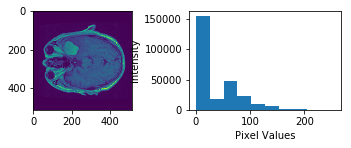

In [56]:
def hist_plot(image): #to plot histogram of pixel values present in an image VS intensities
    img = numpy.array(image)
    plt.subplot(2, 2,1)
    plt.imshow(img)
    plt.subplot(2, 2,2)
    plt.hist(img.ravel()) 
    plt.xlabel('Pixel Values')
    plt.ylabel('Intensity')
hist_plot(Data[29])

Saving the label values as the dataset 

In [177]:
data_output = df_y

In [178]:
data_output

,label
0,1
1,1
2,1
3,1
4,1
5,1
6,1
7,1
8,1
9,1


In [179]:
print(data_output.shape)

(3064, 1)


In [180]:
from sklearn.utils import shuffle #to shuffle the data
Data,data_output= shuffle(Data,data_output)

In [181]:
data_output

,label
1256,3
1574,3
1669,3
1606,3
2198,2
814,2
1909,2
564,1
1530,3
984,3


In [143]:
from tqdm import tqdm
data=[]

for img in tqdm(Data):
    image_ar = cv2.cvtColor(numpy.array(img), cv2.COLOR_RGB2BGR)
    #image_ar = numpy.array(img)
    data.append(cv2.resize(image_ar,(250,250),interpolation=cv2.INTER_CUBIC))

100%|████████████████████████████████████████████████████████████████████████████| 3064/3064 [00:02<00:00, 1139.03it/s]


In [144]:
data_output_encoded = []

In [145]:
data

[array([[[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [3, 3, 3],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [4, 4, 4],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [5, 5, 5],
         [0, 0, 0],
         [0, 0, 0]],
 
        ...,
 
        [[0, 0, 0],
         [2, 2, 2],
         [3, 3, 3],
         ...,
         [5, 5, 5],
         [2, 2, 2],
         [1, 1, 1]],
 
        [[0, 0, 0],
         [2, 2, 2],
         [2, 2, 2],
         ...,
         [4, 4, 4],
         [3, 3, 3],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [1, 1, 1],
         [2, 2, 2],
         ...,
         [3, 3, 3],
         [2, 2, 2],
         [1, 1, 1]]], dtype=uint8), array([[[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0

In [182]:
#changing the class labels to 0,1,2 from 1,2,3
data_output=data_output.replace(to_replace=1,value=0)
data_output=data_output.replace(to_replace=2,value=1)
data_output=data_output.replace(to_replace=3,value=2)

In [183]:
data_output

,label
1256,2.0
1574,2.0
1669,2.0
1606,2.0
2198,1.0
814,1.0
1909,1.0
564,0.0
1530,2.0
984,2.0


In [184]:
from keras.utils import to_categorical #to hot encode the output labels
data_output_encoded =to_categorical(data_output, num_classes=3)
print(data_output_encoded.shape)

(3064, 3)


In [185]:
data_output_encoded

array([[0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       ...,
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.]], dtype=float32)

In [186]:
data=np.array(data)

X_train, X_test, Y_train, Y_test = train_test_split(data, data_output_encoded, test_size=0.4)

#hot encoding them
Y_train_encoded = to_categorical(Y_train, num_classes = 3)
Y_test_encoded = to_categorical(Y_test, num_classes = 3)


print("Number of train files",len(X_train))
print("Number of test files",len(X_test))
print("Number of train_target files",len(Y_train))
print("Number of  test_target  files",len(Y_test))

Number of train files 1838
Number of test files 1226
Number of train_target files 1838
Number of  test_target  files 1226


In [187]:
X_test, X_valid, Y_test, Y_valid = train_test_split(X_test, Y_test, test_size=0.5,shuffle=True)


In [188]:
print("Number of train files",len(X_train))
print("Number of valid files",len(X_valid))
print("Number of train_target files",len(Y_train))
print("Number of  valid_target  files",len(Y_valid))
print("Number of test files",len(X_test))
print("Number of  test_target  files",len(Y_test))

Number of train files 1838
Number of valid files 613
Number of train_target files 1838
Number of  valid_target  files 613
Number of test files 613
Number of  test_target  files 613


In [189]:
from sklearn.utils import shuffle
X_train,Y_train= shuffle(X_train,Y_train)

In [190]:

print(Y_train.shape)
print(Y_test.shape)
print(Y_valid.shape)

(1838, 3)
(613, 3)
(613, 3)


In [191]:
print("Training Data Shape:", X_train.shape)
print("Validation Data Shape:", X_valid.shape)
print("Testing Data Shape:", X_test.shape)
print("Training Label Data Shape:", Y_train.shape)
print("Validation Label Data Shape:", Y_valid.shape)
print("Testing Label Data Shape:", Y_test.shape)

Training Data Shape: (1838, 250, 250, 3)
Validation Data Shape: (613, 250, 250, 3)
Testing Data Shape: (613, 250, 250, 3)
Training Label Data Shape: (1838, 3)
Validation Label Data Shape: (613, 3)
Testing Label Data Shape: (613, 3)


^Difference in the above code, weird!!

In [192]:
import itertools #create iterators for effective looping
#Plotting the confusion matrix for checking the accuracy of the model
def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    
    print(cm)
#     plt.figure(figsize=(6,6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    

    fmt = '.2f'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

# FIRST ATTEMPT - CNN MODEL

In [209]:
from keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D #Import layers for the model
from keras.layers import Dropout, Flatten, Dense, LeakyReLU, PReLU
import keras
from keras.models import Sequential #Our model will be Sequential

model = Sequential()

# First Layer
model.add(Conv2D(filters=16,kernel_size=(3,3), padding='same',activation='tanh',input_shape=(250,250,3))) #CS: changed the input size from (250,250,3) to (250,250) 

model.add(Conv2D(filters=32,kernel_size=(3,3),strides=2,padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D(pool_size=2,strides=2))
model.add(Dropout(0.25))


model.add(Conv2D(filters=64,kernel_size=(3,3),strides=2,padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=2,strides=2))
model.add(Dropout(0.25))

model.add(Conv2D(filters=128,kernel_size=(3,3),strides=2,padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=2,strides=2))
model.add(Dropout(0.25))


model.add(Flatten()) #Flattens the matrix into a vector
model.add(Dense(128, activation='relu')) 
model.add(Dropout(0.25))
model.add(Dense(3, activation='softmax')) 
model.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_38 (Conv2D)           (None, 250, 250, 16)      448       
_________________________________________________________________
conv2d_39 (Conv2D)           (None, 125, 125, 32)      4640      
_________________________________________________________________
leaky_re_lu_10 (LeakyReLU)   (None, 125, 125, 32)      0         
_________________________________________________________________
max_pooling2d_28 (MaxPooling (None, 62, 62, 32)        0         
_________________________________________________________________
dropout_37 (Dropout)         (None, 62, 62, 32)        0         
_________________________________________________________________
conv2d_40 (Conv2D)           (None, 31, 31, 64)        18496     
_________________________________________________________________
max_pooling2d_29 (MaxPooling (None, 15, 15, 64)      

In [210]:
model.compile(optimizer= 'adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy']) #Compiling the model

In [211]:
from keras.callbacks import ModelCheckpoint  #Checkpoint to save the best weights of the model.

checkpointer = ModelCheckpoint(filepath='./Models/model_1.h5', 
                               monitor = "val_acc", 
                               mode = "max",
                               verbose=1, 
                               save_best_only=True) 

earlystop = EarlyStopping(monitor = 'val_acc', # value being monitored for improvement
                          mode = "max",
                          min_delta = 0, #Abs value and is the min change required before we stop
                          patience = 10, #Number of epochs we wait before stopping 
                          verbose = 1) #keeps the best weigths once stopped

history = model.fit(X_train, Y_train, 
          validation_data = (X_test, Y_test),
          epochs=100, batch_size=32, callbacks=[earlystop, checkpointer], verbose=2,shuffle=True)

Train on 1838 samples, validate on 613 samples
Epoch 1/100
 - 100s - loss: 1.0856 - accuracy: 0.4445 - val_loss: 1.0777 - val_accuracy: 0.4502
Epoch 2/100
 - 99s - loss: 1.0676 - accuracy: 0.4684 - val_loss: 1.0721 - val_accuracy: 0.4502
Epoch 3/100
 - 100s - loss: 1.0654 - accuracy: 0.4684 - val_loss: 1.0668 - val_accuracy: 0.4502
Epoch 4/100
 - 101s - loss: 1.0593 - accuracy: 0.4684 - val_loss: 1.0677 - val_accuracy: 0.4502
Epoch 5/100
 - 107s - loss: 1.0558 - accuracy: 0.4684 - val_loss: 1.0625 - val_accuracy: 0.4502
Epoch 6/100
 - 108s - loss: 1.0584 - accuracy: 0.4684 - val_loss: 1.0613 - val_accuracy: 0.4502
Epoch 7/100
 - 107s - loss: 1.0606 - accuracy: 0.4684 - val_loss: 1.0683 - val_accuracy: 0.4502
Epoch 8/100
 - 102s - loss: 1.0513 - accuracy: 0.4684 - val_loss: 1.0614 - val_accuracy: 0.4502
Epoch 9/100
 - 108s - loss: 1.0613 - accuracy: 0.4679 - val_loss: 1.0714 - val_accuracy: 0.4502
Epoch 10/100
 - 111s - loss: 1.0536 - accuracy: 0.4684 - val_loss: 1.0646 - val_accuracy: 

Epoch 86/100
 - 104s - loss: 0.1822 - accuracy: 0.9369 - val_loss: 2.3306 - val_accuracy: 0.4078
Epoch 87/100
 - 125s - loss: 0.1669 - accuracy: 0.9456 - val_loss: 2.2603 - val_accuracy: 0.3980
Epoch 88/100
 - 123s - loss: 0.1704 - accuracy: 0.9380 - val_loss: 2.2765 - val_accuracy: 0.3980
Epoch 89/100
 - 122s - loss: 0.1787 - accuracy: 0.9347 - val_loss: 2.2293 - val_accuracy: 0.4062
Epoch 90/100
 - 127s - loss: 0.1671 - accuracy: 0.9374 - val_loss: 2.1994 - val_accuracy: 0.3931
Epoch 91/100
 - 119s - loss: 0.1750 - accuracy: 0.9353 - val_loss: 2.2949 - val_accuracy: 0.3980
Epoch 92/100
 - 121s - loss: 0.1663 - accuracy: 0.9402 - val_loss: 2.3230 - val_accuracy: 0.4078
Epoch 93/100
 - 117s - loss: 0.1752 - accuracy: 0.9396 - val_loss: 2.2422 - val_accuracy: 0.3834
Epoch 94/100
 - 124s - loss: 0.2055 - accuracy: 0.9276 - val_loss: 2.1104 - val_accuracy: 0.4029
Epoch 95/100
 - 117s - loss: 0.1755 - accuracy: 0.9456 - val_loss: 2.3541 - val_accuracy: 0.4062
Epoch 96/100
 - 116s - loss: 0

In [207]:
# took 2 hour 57 min to run
#model.load_weights('C:/Users/Sandeep Chinnareddy/Models/model_1.h5')

In [213]:
_, acc = model.evaluate(X_test, Y_test, verbose=0)
print('Model Accuracy: %.4f' % acc)

Model Accuracy: 0.4013


In [214]:
predictions = [np.argmax(model.predict(np.expand_dims(feature, axis=0))) for feature in tqdm(X_test)]

100%|████████████████████████████████████████████████████████████████████████████████| 613/613 [00:15<00:00, 38.45it/s]


[[ 37  68  33]
 [ 40 155  81]
 [ 42 103  54]]


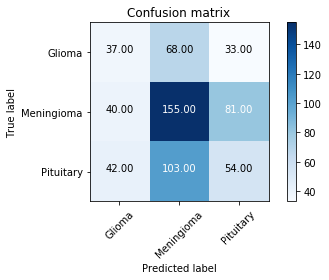

In [220]:
from sklearn.metrics import confusion_matrix #to plot confusion matrix
class_names=["Glioma","Meningioma","Pituitary"]
cnf_matrix_bench=confusion_matrix(np.argmax(Y_test, axis=1), np.array(predictions))
plot_confusion_matrix(cnf_matrix_bench, classes=class_names,
                      title='Confusion matrix')

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


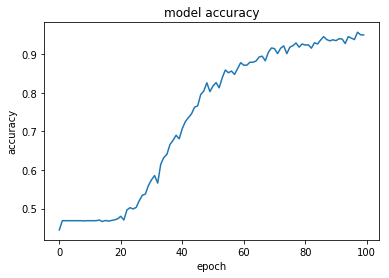

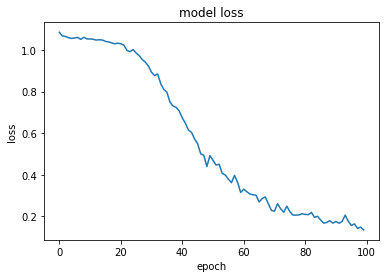

In [216]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
#plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
#plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
#plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
#plt.legend(['train', 'test'], loc='upper left')
plt.show()

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


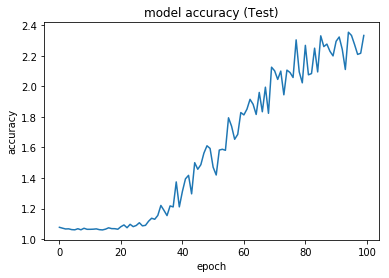

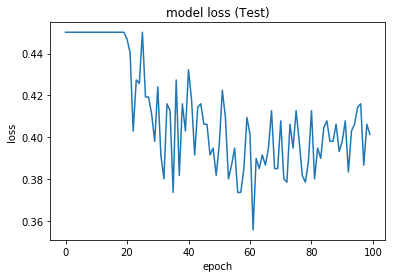

In [219]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
#plt.plot(history.history['accuracy'])
plt.plot(history.history['val_loss'])
plt.title('model accuracy (Test)')
plt.ylabel('accuracy')
plt.xlabel('epoch')
#plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
#plt.plot(history.history['loss'])
plt.plot(history.history['val_accuracy'])
plt.title('model loss (Test)')
plt.ylabel('loss')
plt.xlabel('epoch')
#plt.legend(['train', 'test'], loc='upper left')
plt.show()